# Курс 1, неделя 4. Решение на примере распределения Хи-квадрат

Распределение хи-квадрат определяется следующей функцией плотности распределения:
$$ f_{\chi^2(k)}(x) = \frac{(1/2)^{\frac{k}{2}}}{\Gamma\left(\frac{k}{2}\right)}x^{\frac{k}{2}-1}e^{-\frac{x}{2}}$$ где k - количество степеней свободы. Матожидание и дисперсия для хи-квадрат распределения: $$E[X]=k$$ $$D[X]=2k$$ В решении будем использовать фиксированное значение k=5

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Фиксируем количество степеней свободы k = 5

In [122]:
k = 5

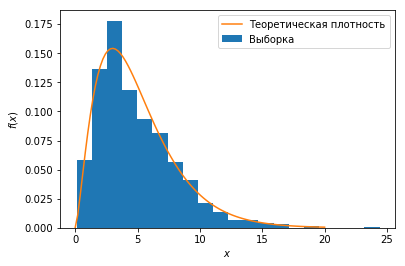

In [124]:
chi2_rv = sts.chi2(df=k)
sample = chi2_rv.rvs(1000) # сгенерировали 1000 случайных величин с заданным хи-квадрат распределением

#отобразим сгенеренную выборку на гистограмме
plt.hist(sample, bins=20, normed=True, label=u'Выборка')

#для сравнения построим поверх график теоретической плотности
x = np.linspace(0,20,100)
plt.plot(x, chi2_rv.pdf(x), label=u'Теоретическая плотность')

#и, наконец, подпишем оси
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc = 'upper right');

Матожидания всех трех наборов выборочных средних должны получиться равными k, т.е. 5 (см.формулу выше). Дисперсии в соответствии с формулой: $$D[\overline{X}]=\frac{D[X]}{n}$$ при D[X]=2k и k = 5 должны получиться равными 2k/5, 2k/10 и 2k/50, т.е. ~2, ~1 и ~0.2 для каждого n из набора [5, 10, 50] соответственно.

Для каждого из трех наборов строим гистограмму и график теоретической плотности с указанными параметрами для сравнения

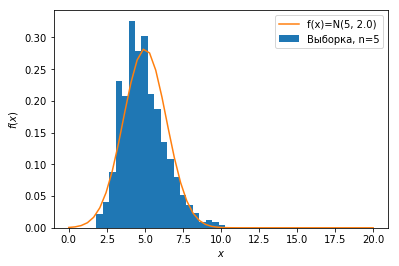

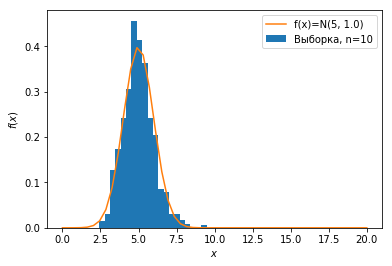

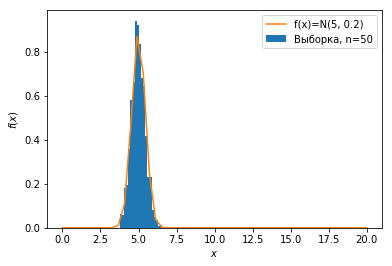

In [125]:
for n in [5, 10, 50]:
    # y - это массив из 1000 выборочных средних для выборок объемом n
    y = [1./n*np.sum(chi2_rv.rvs(n)) for i in np.arange(0, 1000)]
    # построим гистограмму y на 20 баров
    plt.hist(y, bins=20, normed=True, label=u'Выборка, n={}'.format(n))
    # поверх нее для сравнения построим график теоретической плотности нормального распределения
    # c матожиданием и стандартным отклонением, соответствующим n:
    norm_rv = sts.norm(k, np.sqrt(2.*k/n)) # передаем корень из дисперсии по требованиям функции norm
    x = np.linspace(0,20,50)
    plt.plot(x, norm_rv.pdf(x), label=u'f(x)=N({}, {})'.format(k, 2.*k/n))
    # подписываем оси
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(loc = 'upper right')
    #показываем все, что успели накидать на график для текущего n
    plt.show() 

Как видим, с ростом n растет и точность аппроксимации выборочных средних нормальным распределением (при одинаковом объеме выборки в 1000 элементов)